<span style="font-size:18px; font-weight:bold;">

# Comprehensive Guide to Data Visualization with Matplotlib

## Table of Contents
1. [Introduction to Matplotlib](#Introduction-to-Matplotlib)
2. [Basic Plotting](#Basic-Plotting)
3. [Figure Customization](#Figure-Customization)
4. [Plot Types](#Plot-Types)
5. [Multiple Plots and Subplots](#Multiple-Plots-and-Subplots)
6. [Advanced Features](#Advanced-Features)
7. [Saving and Exporting](#Saving-and-Exporting)
8. [Best Practices and Resources](#Best-Practices-and-Resources)

---
<span style="font-size:18px; font-weight:bold;">

## Installation and Setup

**Installation Methods:**

```bash
# Using pip
pip install matplotlib

# Using conda
conda install matplotlib



<span style="font-size:18px; font-weight:bold;">

**Basic Imports**

In [7]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<span style="font-size:18px; font-weight:bold;">

## Introduction to Matplotlib

Matplotlib is Python's foundational plotting library that provides:

- Publication-quality figures in multiple formats
- Interactive visualization capabilities
- Extensive customization options
- Integration with NumPy, Pandas, and Jupyter notebooks

**Core Components:**
- `Figure`: The top-level container for all plot elements
- `Axes`: The area where data is plotted (not to be confused with "axis")
- `Axis`: The number-line-like objects that set limits and generate ticks
- `Artist`: Everything visible on the figure (Text, Line2D, collections, etc.)

**When to Use Matplotlib:**
- Creating precise, customized visualizations
- Scientific and technical computing
- When you need low-level control over plot elements
- Building foundational visualizations for further styling

---

<span style="font-size:18px; font-weight:bold;">

**Explanation: This establishes the core plotting approaches:**

Object-oriented approach (recommended for complex plots)
```python
fig, ax = plt.subplots(figsize=(10,5))  # Create figure and axes objects
ax.plot(dates, temperature, 'teal')  # Plot data on the axes
ax.set_title("Temperature 2023")  # Set title on the axes object
ax.set_ylabel("°C")  # Y-axis label
fig


<span style="font-size:18px; font-weight:bold;">

## Basic Plotting Broken down step by step


In [12]:
# Generate synthetic temperature data
dates = pd.date_range("2023-01-01", periods=365, freq="D")  # Daily dates for a year
base_temp = 10 * np.sin(2 * np.pi * np.arange(365)/365 * 4)  # Seasonal pattern
daily_variation = np.random.normal(0, 3, 365)  # Random daily fluctuations
temperature = base_temp + daily_variation + 15  # Combine components (in °C)

<span style="font-size:18px; font-weight:bold;">

**Step 1: Creating a Figure and Axes**

We use plt.subplots() to create a Figure and Axes object. This is the object-oriented way and allows fine-grained control.

In [15]:
fig, ax = plt.subplots(figsize=(10,5))


<span style="font-size:18px; font-weight:bold;">
    
**Step 2: Plotting Data**

We plot the temperature data on the Axes using:

In [18]:
ax.plot(dates, temperature, 'teal')

<span style="font-size:18px; font-weight:bold;">

**Step 3: Adding Titles and Labels**

Customize your chart with informative labels and a title:

In [21]:
ax.set_title("Temperature 2023")       # Title of the plot
ax.set_ylabel("°C")                    # Y-axis label
ax.set_xlabel("Date")                  # X-axis label

Text(0.5, 25.722222222222214, 'Date')


<span style="font-size:18px; font-weight:bold;">
    
Tip: set_title(), set_xlabel(), and set_ylabel() are methods specific to Axes objects.

<span style="font-size:18px; font-weight:bold;">

**Final Output**

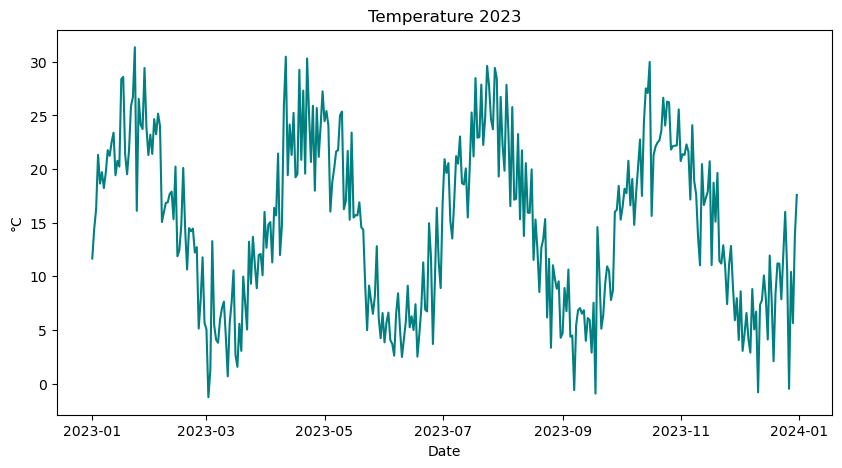

In [25]:
fig

<span style="font-size:18px; font-weight:bold;">

**All in one Cell**

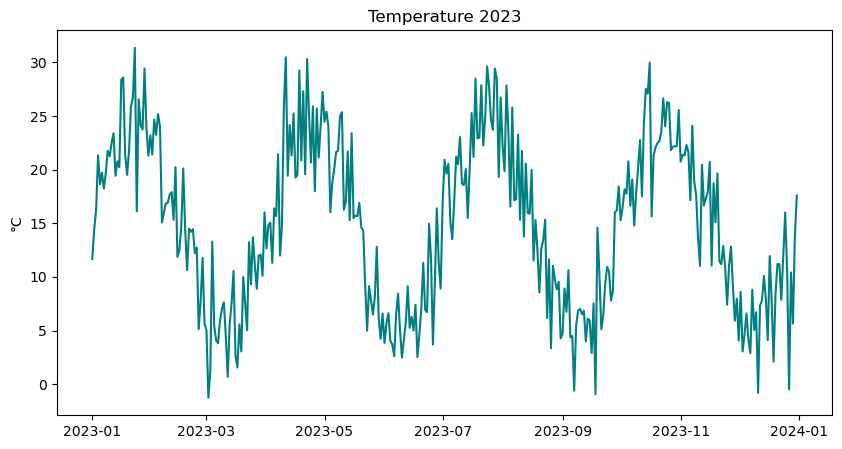

In [28]:

fig, ax = plt.subplots(figsize=(10,5))  # Create figure and axes objects
ax.plot(dates, temperature, 'teal')  # Plot data on the axes
ax.set_title("Temperature 2023")  # Set title on the axes object
ax.set_ylabel("°C")  # Y-axis label
fig

<span style="font-size:18px; font-weight:bold;">

## Figure Customization


Additional Customization Options

| Customization           | Code Example                          |
|-------------------------|---------------------------------------|
| Change line style       | `ax.plot(x, y, linestyle='--')`       |
| Add grid                | `ax.grid(True)`                       |
| Rotate date labels      | `fig.autofmt_xdate()`                 |
| Annotate point          | `ax.annotate("Peak", xy=(date, temp), xytext=(..., ...))` |
| Add legend              | `ax.legend(["Temperature"])`          |
| Set y-limits            | `ax.set_ylim(min, max)`               |

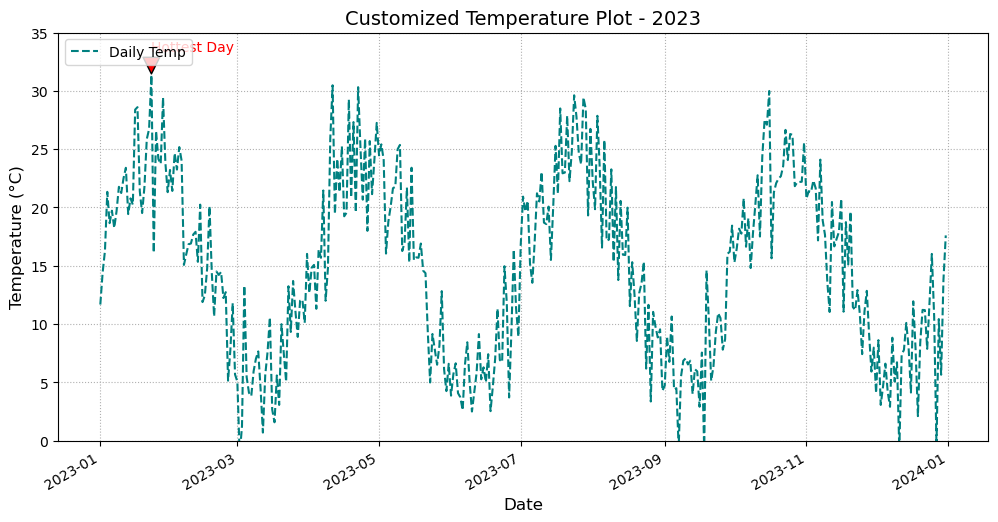

In [31]:
fig, ax = plt.subplots(figsize=(12, 6))

# Plot with custom line style and label
ax.plot(dates, temperature, color='teal', linestyle='--', label='Daily Temp')

# Titles and labels
ax.set_title("Customized Temperature Plot - 2023", fontsize=14)
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Temperature (°C)", fontsize=12)

# Add grid
ax.grid(True, linestyle=':', linewidth=0.8)

# Rotate x-axis labels for readability
fig.autofmt_xdate()

# Add legend
ax.legend(loc='upper left')

# Add y-limits to focus the range
ax.set_ylim(0, 35)

# Annotate the highest temperature point
max_idx = np.argmax(temperature)
ax.annotate("Hottest Day",
            xy=(dates[max_idx], temperature[max_idx]),
            xytext=(dates[max_idx], temperature[max_idx] + 2),
            arrowprops=dict(facecolor='red', shrink=0.05),
            fontsize=10,
            color='red')

# Show the final plot
fig

<span style="font-size:18px; font-weight:bold;">

## Plot Types

Below we will show some examples of the plots you can generate with matplotlib

<span style="font-size:18px; font-weight:bold;">
    
### Statistical Plots


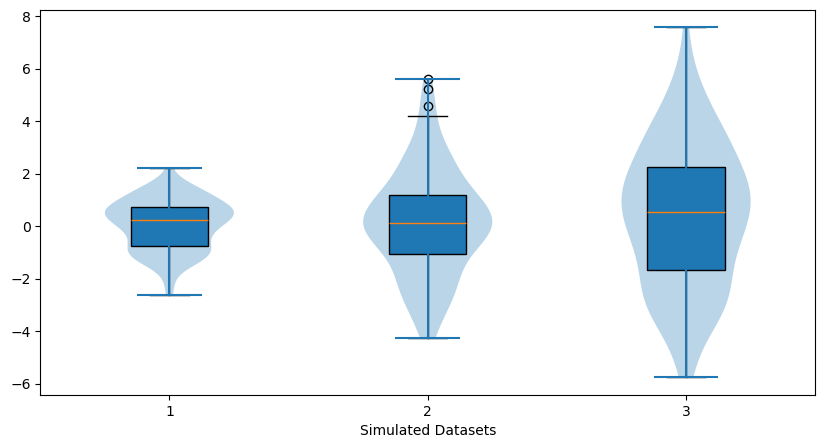

In [35]:
data = [np.random.normal(0, std, 100) for std in range(1,4)]
# Boxplot and Violin Plot
fig1, ax1 = plt.subplots(figsize=(10,5)) 
ax1.boxplot(data, vert=True, patch_artist=True)
# Violin plot
ax1.violinplot(data, showmedians=True)
ax1.set_xlabel("Simulated Datasets")

fig1

<span style="font-size:18px; font-weight:bold;">
    
### 3D Plots


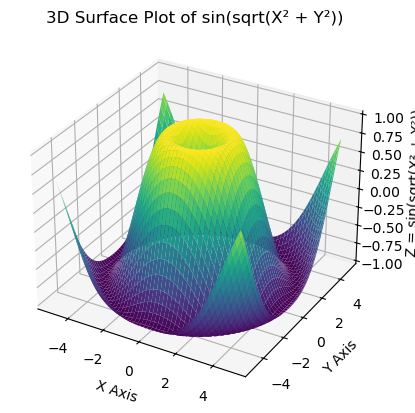

In [82]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = np.meshgrid(np.linspace(-5,5,100), np.linspace(-5,5,100))
Z = np.sin(np.sqrt(X**2 + Y**2))
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel("X Axis")
ax.set_ylabel("Y Axis")
ax.set_zlabel("Z = sin(sqrt(X² + Y²))")
ax.set_title("3D Surface Plot of sin(sqrt(X² + Y²))")

fig

<span style="font-size:18px; font-weight:bold;">


### Heatmaps

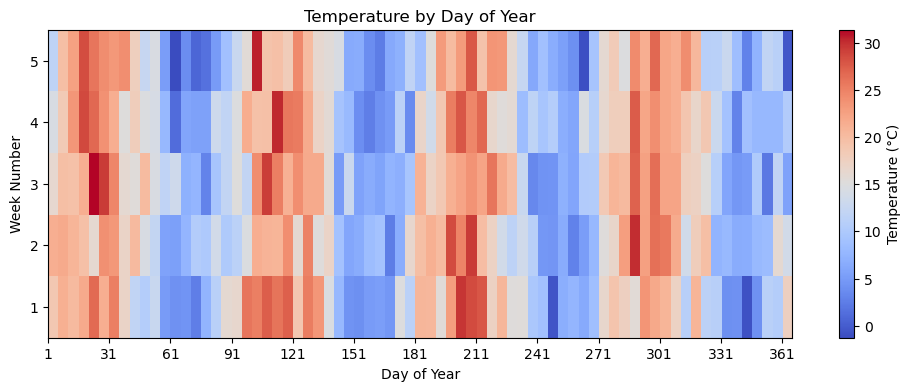

In [85]:
# Prepare matrix (day-of-year x year)
temp_matrix = np.reshape(temperature, (73, 5))  # 5-day weeks

# Create figure and axis objects
fig, ax = plt.subplots(figsize=(12, 4))

# Create the heatmap visualization
heatmap = ax.imshow(temp_matrix.T, 
                   cmap='coolwarm', 
                   aspect='auto',
                   extent=[1, 366, 0.5, 5.5])

# Add colorbar
cbar = fig.colorbar(heatmap, ax=ax, label="Temperature (°C)")

# Configure plot
ax.set_title("Temperature by Day of Year")
ax.set_xlabel("Day of Year")
ax.set_ylabel("Week Number")
ax.set_xticks(np.arange(1, 366, 30))
fig

<span style="font-size:18px; font-weight:bold;">
    
### Specialized Plots

Contour Plot
A contour plot is a 2D representation of a 3D surface, where lines connect points of equal value. In this case, the plot shows contours of the function $Z = \sin(\sqrt{X^2 + Y^2})$. Each contour line represents a constant value of $Z$, making it easy to visualize the shape of the surface from above — like elevation lines on a topographic map.

Quiver Plot
A quiver plot displays a vector field using arrows. Each arrow represents both direction and magnitude of a vector at a specific point. Here, the arrows are derived from the function's values and show how the direction of change varies across the grid. This is useful in fields like fluid dynamics or electromagnetism, where direction and flow are important.

Together, these plots give a rich picture of both the scalar field (values of $Z$) and the directional behavior (how $Z$ changes across space).

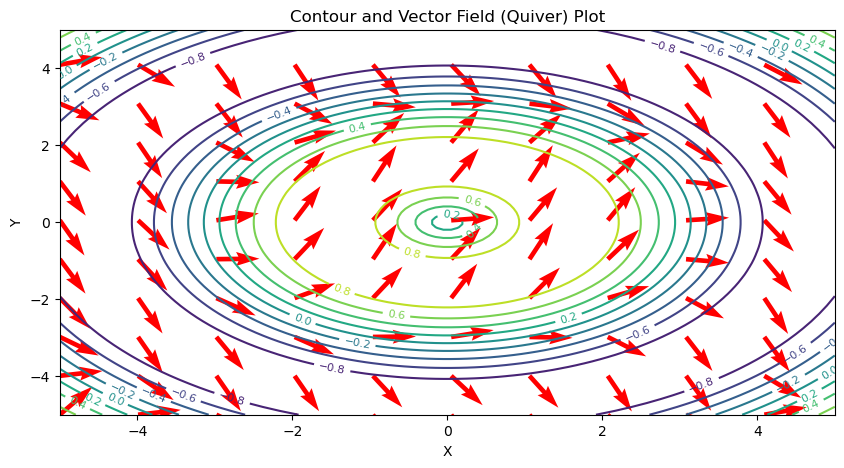

In [88]:
fig, ax = plt.subplots(figsize=(10, 5))

# Contour plot
contour = ax.contour(X, Y, Z, levels=10, cmap='viridis')

# Quiver plot (vector field) using gradients of Z
U = np.cos(Z)
V = np.sin(Z)
ax.quiver(X[::10, ::10], Y[::10, ::10], U[::10, ::10], V[::10, ::10], color='red')

# Add labels and title
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("Contour and Vector Field (Quiver) Plot")

# Optional: add contour labels
ax.clabel(contour, inline=True, fontsize=8)

fig

<span style="font-size:18px; font-weight:bold;">
    
### Summary of the Plots Available with Matplotlib

Purpose: Choose the Right Visualization in Matplotlib

#### Core 2D Plots

| Plot Type       | Code Example                                      | Best For                              |
|-----------------|---------------------------------------------------|----------------------------------------|
| Line            | `plt.plot(x, y)`                                  | Trends, time series                    |
| Scatter         | `plt.scatter(x, y, c=z, cmap='viridis')`          | Relationships, clusters                |
| Bar             | `plt.bar(categories, values)`                     | Discrete comparisons                   |
| Horizontal Bar  | `plt.barh(categories, values)`                    | Discrete comparisons (long labels)     |
| Histogram       | `plt.hist(data, bins=30)`                         | Distribution shape                     |
| Boxplot         | `plt.boxplot(data, vert=False)`                   | Statistical summary, outliers          |
| Pie             | `plt.pie(sizes, labels=labels, autopct='%1.1f%%')`| Composition (use sparingly)            |
| Stacked Area    | `plt.stackplot(x, y1, y2, y3)`                     | Part-to-whole over time                |
| Stem            | `plt.stem(x, y)`                                  | Discrete signal data                   |
| Step            | `plt.step(x, y, where='mid')`                     | Stair-step transitions                 |
| Error Bars      | `plt.errorbar(x, y, yerr=err)`                    | Showing uncertainty in measurements    |
| Fill Between    | `plt.fill_between(x, y1, y2)`                     | Confidence intervals, area between     |
| Hexbin          | `plt.hexbin(x, y, gridsize=30, cmap='Blues')`     | 2D density estimation                  |

---

#### 2D Field & Image Plots

| Plot Type       | Code Example                                      | Best For                              |
|-----------------|---------------------------------------------------|----------------------------------------|
| Image           | `plt.imshow(data, cmap='hot')`                    | Visualizing 2D arrays, heatmaps        |
| Contour         | `plt.contour(X, Y, Z, levels=20)`                 | Level curves                           |
| Filled Contour  | `plt.contourf(X, Y, Z, cmap='viridis')`           | Smooth surface maps                    |
| Quiver          | `plt.quiver(X, Y, U, V)`                          | Vector fields                          |
| Streamplot      | `plt.streamplot(X, Y, U, V)`                      | Flow visualization                     |
| Pseudocolor     | `plt.pcolormesh(X, Y, Z, cmap='plasma')`          | Fine-grained heatmap                   |
| Matrix View     | `plt.matshow(matrix)`                             | Quick matrix visualization             |

---

#### 3D Plots (`mpl_toolkits.mplot3d`)

| Plot Type       | Code Example                                                  | Best For                              |
|-----------------|---------------------------------------------------------------|----------------------------------------|
| 3D Line         | `ax.plot(x, y, z)`                                            | Parametric 3D curves                   |
| 3D Scatter      | `ax.scatter(x, y, z, c=z, cmap='viridis')`                    | 3D relationships/clusters              |
| 3D Surface      | `ax.plot_surface(X, Y, Z, cmap='viridis')`                    | Surface topography                     |
| 3D Wireframe    | `ax.plot_wireframe(X, Y, Z)`                                  | Grid surfaces                          |
| 3D Contour      | `ax.contour3D(X, Y, Z, levels=30, cmap='binary')`             | 3D contour slices                      |
| 3D Bars         | `ax.bar3d(x, y, z, dx, dy, dz)`                               | Categorical data in 3D                 |

<span style="font-size:18px; font-weight:bold;">
    
> Note: For 3D plots, create axes with:  
> `from mpl_toolkits.mplot3d import Axes3D`  
> `fig = plt.figure(); ax = fig.add_subplot(111, projection='3d')`

<span style="font-size:18px; font-weight:bold;">
    
## Advanced Features: Interactive and Animation

Interactive Plotting in Matplotlib with Sliders

One powerful feature of Matplotlib is the ability to add interactive widgets like sliders and buttons. This enables dynamic updates to your plots without re-running the entire cell or script.

In this lecture, we'll walk through creating an interactive plot that updates a sine wave based on the amplitude selected by the user via a slider.

---

Requirements

To enable interactivity in Jupyter Notebook:

```python

%matplotlib widget

pip install ipympl



### Interactive Plots

0

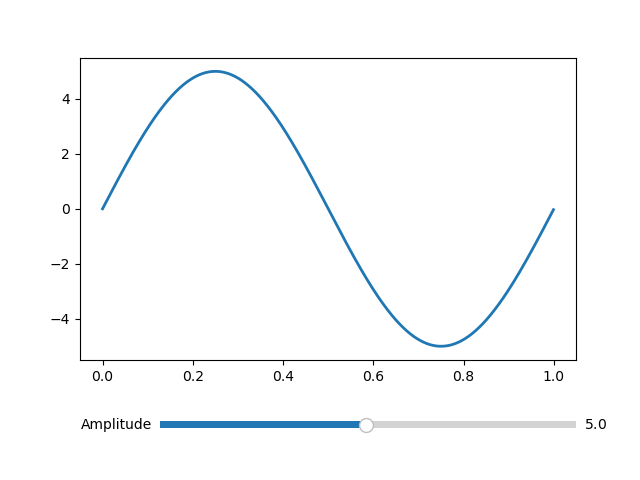

In [93]:
%matplotlib widget

from matplotlib.widgets import Slider

# Initial setup
fig, ax = plt.subplots()
plt.subplots_adjust(bottom=0.25)

# Signal setup
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
s = a0 * np.sin(2 * np.pi * t)
l, = ax.plot(t, s, lw=2)

# Slider axis and Slider
ax_slider = plt.axes([0.25, 0.1, 0.65, 0.03])
slider = Slider(ax_slider, 'Amplitude', 0.1, 10.0, valinit=a0)

# Update function
def update(val):
    amp = slider.val
    l.set_ydata(amp * np.sin(2 * np.pi * t))
    fig.canvas.draw_idle()

slider.on_changed(update)


<span style="font-size:18px; font-weight:bold;">
    
### Animation

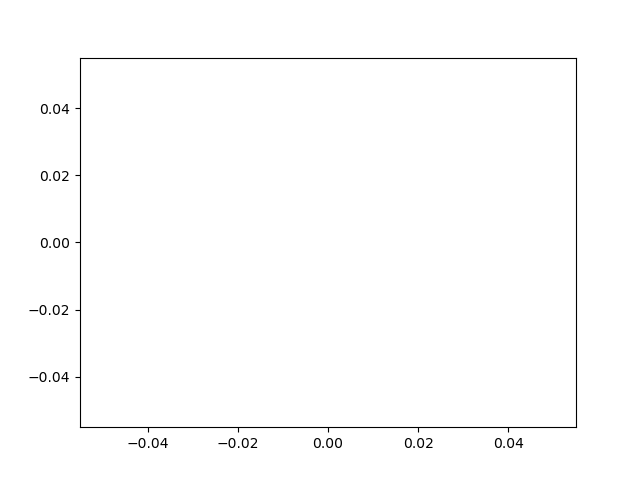

In [104]:
from matplotlib.animation import FuncAnimation

# Create figure and axis
fig, ax = plt.subplots()

# Initialize empty line plot
line, = ax.plot([], [], 'ro')  # red dots
x_data, y_data = [], []

def init():
    """Initialize the animation frame"""
    ax.set_xlim(0, 2*np.pi)
    ax.set_ylim(-1, 1)
    return line,

def update(frame):
    """Update the plot for each frame"""
    x_data.append(frame)
    y_data.append(np.sin(frame))
    line.set_data(x_data, y_data)
    return line,

# Create animation
animation = FuncAnimation(
    fig=fig,
    func=update,
    frames=np.linspace(0, 2*np.pi, 128),
    init_func=init,
    blit=True
)


<span style="font-size:18px; font-weight:bold;">

# Saving and Exporting Figures in Matplotlib

Once you've created a plot with Matplotlib, you can **save it directly** to a file using `fig.savefig()`.

---

## Basic Usage

```python
fig, ax = plt.subplots()
ax.plot([1, 2, 3], [4, 6, 5])
fig.savefig("my_plot.png")

```
### Supported Formats  
Matplotlib supports many formats:  

| Format | Extension | Use Case                     |  
|--------|-----------|------------------------------|  
| PNG    | .png      | Web, presentations           |  
| PDF    | .pdf      | Publications, printing       |  
| SVG    | .svg      | Scalable vector graphics     |  
| EPS    | .eps      | LaTeX and academic papers    |  
| JPG    | .jpg      | Lightweight web usage        |  

### Customizing the Export  
You can specify resolution, bounding box, and background:  

```python
fig.savefig("my_plot.pdf", dpi=300, bbox_inches='tight', transparent=True)
```

| Argument               | Description                                      |
|------------------------|--------------------------------------------------|
| `dpi=300`             | Sets high resolution (dots per inch)            |
| `bbox_inches='tight'` | Crops extra whitespace around the figure        |
| `transparent=True`    | Removes white background (for PNG/PDF)          |

## Best Practices & Resources

```python
# Always include this at the start of your notebook
%matplotlib inline  # or %matplotlib widget for interactive
import matplotlib.pyplot as plt
import numpy as np
```

---

## **Best Practices**  
*Professional workflow for production-quality plots*

### 1. **Object-Oriented Interface**  
```python
# ✅ Recommended 
fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, y)  
ax.set_title("Professional Plot")

# ❌ Avoid  
plt.plot(x, y)  
plt.title("Basic Plot")
```


### 2. **Complete Labels**  
```python
ax.set_xlabel("Time (hours)", fontsize=12)  
ax.set_ylabel("Temperature (°C)", fontsize=12)
```

### 3. **Publication-Ready Export**  
```python
fig.savefig("plot.pdf",  # Vector format  
           format='pdf',
           dpi=300,
           bbox_inches='tight')
```

### 4. **Color Documentation**  
```python
# Add to figure caption or code comments:
# Colors: Blue (#1f77b4)=Raw Data, Red (#d62728)=Threshold
```

---

## **Resources**  
*Essential learning materials*

### Official Guides  
[Matplotlib Documentation](https://matplotlib.org/stable/contents.html)  
[Example Gallery](https://matplotlib.org/stable/gallery/index.html)

### Cheatsheets  
[Official Cheatsheet PDF](https://matplotlib.org/cheatsheets/cheatsheets.pdf)  
[Quick Reference Guide](https://matplotlib.org/stable/api/cheatsheet.html)

### Books  
 **Python Data Science Handbook**  
*By Jake VanderPlas*  
▶︎ [Free Online Version](https://jakevdp.github.io/PythonDataScienceHandbook/)

---